In [17]:
# All Includes

import random
import numpy as np
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn import metrics
import os
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder



In [18]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)

In [19]:
INPUT_SIGNAL_TYPES = [
    "Accelerometer_x",
    "Accelerometer_y",
    "Accelerometer_z",
    "Gyroscope_x",
    "Gyroscope_y",
    "Gyroscope_z",
    "Gravity_x",
    "Gravity_y",
    "Gravity_z",
    "Magnetometer_x",
    "Magnetometer_y",
    "Magnetometer_z"
]


In [20]:
def load_data(window_size,position):
#     window_size=0.8
    path="D:/dell-PC/CAR/Data/data/UCI HAR Dataset/total/data_for_dl_category by sheets_"+position+".xlsx_" + str(window_size) + ".csv"
    data=pd.read_csv(path,header=0,index_col=None)
    subject_names=["Rebar1","Rebar2","Rebar3","Carpenter1","Carpenter2","Masonry1","Masonry2"]
    data.loc[data["Label_2"]==4,"Label_2"]=3
    data.loc[data["Label_2"]==5,"Label_2"]=4
    data.loc[data["Label_2"]==6,"Label_2"]=3
    data.loc[data["Label_2"]==7,"Label_2"]=3
    data.loc[data["Label_2"]==8,"Label_2"]=5
    data.loc[data["Label_2"]==9,"Label_2"]=6
    data.loc[data["Label_2"]==11,"Label_2"]=7
    data.loc[data["Label_2"]==12,"Label_2"]=8
    data.head(10)
    return data

选择对象

In [21]:
def dataset_generate(window_size,data,subject):
    # data_temp=data.loc[["Rebar2"],:]
    # data_temp=data.loc[data["Subject"]=="Rebar1" ,:]
    window=int(window_size*50)
    data_temp=data[data["Subject"].isin(subject)]
#     data_temp=data.loc[["Rebar2"],:]
#     data_temp=data.loc[data["Subject"]==subject ,:]
    data_subject=np.array(data_temp[data_temp["Label_2"].isin([1,2,3,4,5])])
    print(data_subject.shape)
    data_subject=np.reshape(data_subject,(-1,window,15))
    print(data_subject.shape)
    X=data_subject[:,:,3:]
    X=X.astype("float64")
    Y=data_subject[:,0,2]
    Y=Y.astype("int")
    Group=data_subject[:,0,1]
    print(X.shape)
    print(Y.shape)
    print(Group.shape)
    return X,Y,Group

查看数据类别分布

In [22]:
from collections import Counter
def distribution_check(Y):
    Y_count=np.array(Y[:])
    print(Y.shape)
    print(Counter(Y_count))
#     print(Counter(Group))

整数编码

In [23]:
from sklearn.preprocessing import LabelEncoder
def int_encoder(Y):
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(Y)
    print(Counter(Y))
    return Y

定义smote函数

In [24]:
import imblearn as ib
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
def smote(X_train,y_train,subject):
    dim0=X_train.shape[0]
    dim1=X_train.shape[1]
    dim2=X_train.shape[2]
    X_trian_for_smote=np.reshape(X_train,(dim0,dim1*dim2))
    
#     sme = SMOTETomek(random_state=42)
#     X_train_smo, y_train = sme.fit_resample(X_trian_for_smote, y_train)
#     rus = RandomUnderSampler(random_state=42,sampling_strategy='majority')
#     X_res, y_res = rus.fit_resample(X_trian_for_smote, y_train)
    if subject=="Carpenter1":
        smo = SMOTE(random_state=42,sampling_strategy={1:500,2:500})
    elif subject=="Carpenter2":
        smo = SMOTE(random_state=42,sampling_strategy={2:500})
#     elif subject=="Masonry1" or "Masonry2":
#         smo = SMOTE(random_state=42,sampling_strategy={1:300})
    elif subject=="Rebar1" or "Rebar2" or "Rebar3":
        smo = SMOTE(random_state=42,sampling_strategy={2:300,3:300})

    X_train_smo, y_train = smo.fit_resample(X_trian_for_smote, y_train)
#     cnn = CondensedNearestNeighbour(random_state=42,sampling_strategy='majority') 
#     X_res, y_train = cnn.fit_resample(X_trian_for_smote, y_train ) 
    X_train=np.reshape(X_train_smo,(X_train_smo.shape[0],dim1,dim2))
    return X_train,y_train

构建模型

In [25]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
# # from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM
# def construct_model(kernel_size,filters_num,pool,window_size_for_model,LSTM_num,class_num):
#     model = Sequential([
#         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same',input_shape=(window_size_for_model,12), name = 'cnn_1'),
#         BatchNormalization(name='batchnorm_layer_1'),
# #         MaxPooling1D(pool_size=pool, name = 'maxpooling_1'),
# #         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_2'),
# # #         MaxPooling1D(pool_size=pool, name = 'maxpooling_2'),
# #         BatchNormalization(name='batchnorm_layer_2'),
# #         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_3'),
# # #         MaxPooling1D(pool_size=pool, name = 'maxpooling_2'),
# #         BatchNormalization(name='batchnorm_layer_3'),
# #         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_4'),
# # #         MaxPooling1D(pool_size=pool, name = 'maxpooling_2'),
# #         BatchNormalization(name='batchnorm_layer_4'),
# #         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_5'),
# # #         MaxPooling1D(pool_size=pool, name = 'maxpooling_3'),
# #         BatchNormalization(name='batchnorm_layer_5'),
# #         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_4'),
# # #         MaxPooling1D(pool_size=pool, name = 'maxpooling_3'),
# #         BatchNormalization(name='batchnorm_layer_4'),
# #         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_5'),
# # #         MaxPooling1D(pool_size=pool, name = 'maxpooling_3'),
# #         BatchNormalization(name='batchnorm_layer_5'),
# #         Flatten(),
#         LSTM(LSTM_num,return_sequences = True, name = 'lstm_1'),
#         Dropout(0.4, name = 'Dropout_1'),
# #         BatchNormalization(name='batchnorm_layer_1'),
#         LSTM(LSTM_num, return_sequences = False, name = 'lstm_2'),
#         Dropout(0.4, name = 'Dropout_2'),
# #         LSTM(LSTM_num, return_sequences = False, name = 'lstm_3'),
# #         Dropout(0.4, name = 'Dropout_3'),
# #         BatchNormalization(name='batchnorm_layer_2'),
#         Flatten(),
#     #     Dense(128, activation= 'relu', name = 'dense_2'),
#     #     Dropout(0.3, name = 'Dropout_4'),
#     #     Dense(64, activation = 'relu', name = 'dense_3'),
#     #     Dropout(0.3, name = 'Dropout_5'),
# #         Dense(32, activation= 'relu', name = 'dense_1'),
#     #     Dropout(0.3, name = 'Dropout_3'),
#         Dense(class_num, activation = 'softmax', name = 'output')])

#     opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

#     model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#     # plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#     model.summary()
#     return model

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM,AveragePooling1D
def construct_model(kernel_size,filters_num,pool,window_size_for_model,LSTM_num,class_num,conv_layer_num):
    model = Sequential()
    for i in range(1,conv_layer_num+1):
        if i==1:
            model.add(Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same',input_shape=(window_size_for_model,12)))
            model.add(BatchNormalization())
            model.add(AveragePooling1D(pool_size=pool))
#             model.add(MaxPooling1D(pool_size=pool))
        else:
            model.add(Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same',input_shape=(window_size_for_model,12)))
            model.add(BatchNormalization())
            
#         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_2'),
# #         MaxPooling1D(pool_size=pool, name = 'maxpooling_2'),
#         BatchNormalization(name='batchnorm_layer_2'),
#         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_3'),
# #         MaxPooling1D(pool_size=pool, name = 'maxpooling_2'),
#         BatchNormalization(name='batchnorm_layer_3'),
#         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_4'),
# #         MaxPooling1D(pool_size=pool, name = 'maxpooling_2'),
#         BatchNormalization(name='batchnorm_layer_4'),
#         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_5'),
# #         MaxPooling1D(pool_size=pool, name = 'maxpooling_3'),
#         BatchNormalization(name='batchnorm_layer_5'),
#         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_4'),
# #         MaxPooling1D(pool_size=pool, name = 'maxpooling_3'),
#         BatchNormalization(name='batchnorm_layer_4'),
#         Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_5'),
# #         MaxPooling1D(pool_size=pool, name = 'maxpooling_3'),
#         BatchNormalization(name='batchnorm_layer_5'),
#         Flatten(),
#     model.add(LSTM(LSTM_num,input_shape=(window_size_for_model,12),return_sequences = True, name = 'lstm_1'))
#     model.add(Dropout(0.4, name = 'Dropout_1'))
# #         BatchNormalization(name='batchnorm_layer_1'),
#     model.add(LSTM(LSTM_num, return_sequences = False, name = 'lstm_2'))
#     model.add(Dropout(0.4, name = 'Dropout_2'))
#         LSTM(LSTM_num, return_sequences = False, name = 'lstm_3'),
#         Dropout(0.4, name = 'Dropout_3'),
#         BatchNormalization(name='batchnorm_layer_2'),
    model.add(Dense(256, activation = 'sigmoid'))
    model.add(Dense(256, activation = 'sigmoid'))
    model.add(Flatten())
    #     Dense(128, activation= 'relu', name = 'dense_2'),
    #     Dropout(0.3, name = 'Dropout_4'),
    #     Dense(64, activation = 'relu', name = 'dense_3'),
    #     Dropout(0.3, name = 'Dropout_5'),
#         Dense(32, activation= 'relu', name = 'dense_1'),
    #     Dropout(0.3, name = 'Dropout_3'),
    model.add(Dense(class_num, activation = 'softmax', name = 'output'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

    model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    # plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    model.summary()
    return model

In [27]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
# # from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM
# import tensorflow.keras.backend as K
# from tensorflow.keras.layers import Lambda,Input
# def construct_model(kernel_size,filters_num,pool,window_size_for_model,LSTM_num,class_num):
# #     model = Sequential()
#     input=Input(shape=(window_size_for_model,12))
#     x=Conv1D(filters=filters_num, kernel_size=kernel_size, activation='relu',padding = 'same', name = 'cnn_1')(input)
#     x=BatchNormalization(name='batchnorm_layer_1')(x)
# #         Flatten(),
#     x=Flatten()(x)
    
#     x=Lambda(lambda x:K.expand_dims(x,axis=-1))(x)
    
#     x=LSTM(LSTM_num,return_sequences = True, name = 'lstm_1')(x)
#     x=Dropout(0.4, name = 'Dropout_1')(x)
# #         BatchNormalization(name='batchnorm_layer_1'),
#     x=LSTM(LSTM_num, return_sequences = False, name = 'lstm_2')(x)
#     x=Dropout(0.4, name = 'Dropout_2')(x)
# #         LSTM(LSTM_num, return_sequences = False, name = 'lstm_3'),
# #         Dropout(0.4, name = 'Dropout_3'),
# #         BatchNormalization(name='batchnorm_layer_2'),
# #     Dense(128, activation= 'relu', name = 'dense_2'),
# #     Dropout(0.3, name = 'Dropout_4'),
# #     Dense(64, activation = 'relu', name = 'dense_3'),
# #     Dropout(0.3, name = 'Dropout_5'),
#     x=Dense(32, activation= 'relu', name = 'dense_1')(x)
# #     Dropout(0.3, name = 'Dropout_3'),
#     predic=Dense(class_num, activation = 'softmax', name = 'output')(x)
    
#     model=Model(inputs=input,outputs=predic)
#     opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

#     model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#     # plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#     model.summary()
#     return model

模型训练

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from timeit import default_timer as timer
def model_fit(model,X_train, y_train,X_validation,y_validation,batch_size):
    earlystop_callback=EarlyStopping(monitor="val_loss",patience=5)
    modelcheckpoint=ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy",save_best_only=True)
    start = timer()
#     class_weight = {0 : 1., 1: 10., 2: 10., 3: 5., 4: 3.}

    history = model.fit( X_train, y_train, epochs = 300,validation_data = (X_validation,y_validation), batch_size=batch_size ,callbacks=[earlystop_callback,modelcheckpoint], verbose=1)
#     validation_data = (X_validation,y_validation)

    end = timer()
    print("\n")
    print("Time: ",(end - start),"secs = ",(end - start)/3600,"hours")


    # ## EVALUATION AND THE PERFORMANCE METRICS

    # In[62]:


    # Plotting loss and accuracy graph
    plt.figure(figsize=(12, 8))

    plt.plot(np.array(history.history['loss']), "r--", label="Train loss")
    plt.plot(np.array(history.history['accuracy']), "g--", label="Train accuracy")

    plt.plot(np.array(history.history['val_loss']), "r-", label="validation loss")
    plt.plot(np.array(history.history['val_accuracy']), "g-", label="validation accuracy")

    plt.title("Training session's progress over iterations(imbalanced data)")
    plt.legend(loc='upper right', shadow=True)
    plt.ylabel('Training Progress (Loss or Accuracy values)')
    plt.xlabel('Training Epoch')
    plt.ylim(0)

    plt.show()

绘图

In [29]:
import itertools
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'
def plot_confusion_matrix(cm, classes,class_num,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0,fontsize=25)
    plt.yticks(tick_marks, classes,fontsize=25)
    ax = plt.gca()
    ax.set_ylim(-.5, class_num-0.5)
    ax.set_xlim(-.5, class_num-0.5)
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=20,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)

模型预测以及结果输出

In [30]:
def model_test(model,X_test,y_test,class_num,LABELS):
#     results = dict()
    test_pred = np.argmax(model.predict(X_test), axis=1)
#     print(test_pred)
    #输出分类结果
#     print(y_test)
#     print(test_pred)
    classfication_report=metrics.classification_report(y_test,test_pred)
    results=float(100*metrics.f1_score(y_test, test_pred, average="macro"))
#     results['classification_report'] = classification_report
    print(classfication_report)
    #输出混淆矩阵
    cm = metrics.confusion_matrix(y_test, test_pred)
    print("Confusion Matrix:")
    print(cm)
    #绘制归一化混淆矩阵
    plt.figure(figsize=(class_num,class_num))
    plt.grid(b=False)
    plot_confusion_matrix(cm, LABELS,class_num, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.Reds)
    ax = plt.gca()
    plt.show()
    #绘制非归一化混淆矩阵
    plt.figure(figsize=(class_num,class_num))
    plot_confusion_matrix(cm, LABELS,class_num, normalize=False, title='confusion matrix',cmap=plt.cm.Reds)
    ax = plt.gca()
    plt.show()
    return results,cm

In [31]:
# from sklearn.model_selection import StratifiedKFold
# skf1 = StratifiedKFold(n_splits=5,shuffle=True)
# skf2 = StratifiedKFold(n_splits=5,shuffle=False)

# from sklearn.model_selection import LeaveOneGroupOut
# logo = LeaveOneGroupOut()
# # logo.get_n_splits(X, Y, group)

# from sklearn.model_selection import LeavePGroupsOut
# lpgo = LeavePGroupsOut(n_groups=2)

# from sklearn.model_selection import StratifiedGroupKFold
# sgkf=StratifiedGroupKFold(n_splits=3,shuffle=True)

# window_sizes=[0.6]
# positions=["xd"]
# conv_layers_num=[2] #最优2
# filters_nums=[256] #最优256
# kernel_sizes=[3] #最优3
# LSTM_nums=[64] #最优64

# for position in positions:
#     for window_size in window_sizes:
#         for conv_layer_num in conv_layers_num:
#             for filters_num in filters_nums:
#                 for kernel_size in kernel_sizes:
#                     for LSTM_num in LSTM_nums:
#                         print("--------------开始"+position+"_"+str(window_size)+"s_卷积层数为"+str(conv_layer_num)+"_lstm单元数为"+str(LSTM_num)+"_卷积核数为"+str(filters_num)+"_卷积核大小为"+str(kernel_size)+"的personalized实验--------------")
#                         data=load_data(window_size,position)
#                         class_num=5
# #                         subjects=["Rebar1","Rebar2","Rebar3"]
# #                         subjects=["Rebar1","Rebar2","Rebar3","Carpenter1","Carpenter2","Masonry1","Masonry2"]
#                         subjects=["Rebar1","Rebar2","Rebar3"]
#                         LABELS = [ "ST", "WK",  "TR", "BD", "SQ"]
#                 #         for subject in subjects:
#                 #             if subject=="Carpenter1" or subject=="Carpenter2":
#                 #                 class_num=5
#                 #                 LABELS = [ "ST", "WK",  "TR", "BD", "SQ"] 
#                 # #             elif subject=="Masonry1" or subject=="Masonry2":
#                 # #                 class_num=6
#                 # #                 LABELS = [ "ST", "WK",  "TR", "BD", "SQ","WO"] 
#                 #             else:
#                 #                 LABELS = [ "ST", "WK", "TR", "BD", "SQ"]

#                 #         print("--------------开始第"+subject+"--------------")
#                         X,Y,Group=dataset_generate(window_size,data,subjects)
#                         distribution_check(Y)
#                         Y=int_encoder(Y)
#                         # filter=[32,64,128]
#                         # kernel_sizes=[3,4,7,9]
#                         # LSTM_nums=[16,32,64,128]
#                         # for kernel_size in kernel_sizes:
#                         average_macrof1_score_total=0.0
#                         num=1
#                         confusion_matrix_total=np.zeros((class_num,class_num))
#                         # print("--------------开始LSTM_num为"+str(kernel_size)+"的实验--------------")
# #                         for train_total_index, test_index in skf1.split(X, Y):
#                         for train_total_index, test_index in logo.split(X, Y,Group):
# #                             print("--------------开始第"+str(num)+"次交叉验证--------------")
#                             print("当前为"+str(Group[test_index[0],]))
                            
#                             confusion_matrix_subject=np.zeros((class_num,class_num))
#                             average_macrof1_score_subject=0.0
            
#                             X_all, y_all = X[test_index],Y[test_index]
#                             print(Counter(y_all))
#                             X_train, y_train = [],[]
#                             X_validation,y_validation=[],[]
#                             number=1
#                             for train_index, validation_index in skf1.split(X_all, y_all):
#                                 X_train, y_train = X_all[train_index],y_all[train_index]
#                                 print(Counter(y_train))
#                                 X_train, y_train=smote(X_train, y_train,str(Group[test_index[0],]))
#                                 X_validation,y_validation=X_all[validation_index],y_all[validation_index]
#                                 print("训练集第"+str(number)+"次")
#                                 print("训练集比例")
#                                 print(Counter(y_train))
#                                 print("测试集比例")
#                                 print(Counter(y_validation))
#                                 model=construct_model(conv_layer_num=conv_layer_num ,kernel_size=kernel_size,filters_num=filters_num,pool=3,window_size_for_model=int(window_size*50),LSTM_num=LSTM_num,class_num=class_num)
#                                 model_fit(model,X_train=X_train,y_train=y_train,X_validation=X_validation,y_validation=y_validation,batch_size=64)
#                                 results,confusion_matrix_temp=model_test(model,X_test=X_validation,y_test=y_validation,class_num=class_num,LABELS=LABELS)
#                                 average_macrof1_score_subject=average_macrof1_score_subject + results
#                                 confusion_matrix_subject=confusion_matrix_subject+confusion_matrix_temp
#                                 del model
#                                 number=number+1
#                             print(confusion_matrix_subject)
#                             print(str(Group[test_index[0],])+"_"+position+"_"+str(window_size)+"的average-macro-f1-score:"+str(average_macrof1_score_subject/(number-1))+"%")
#                             #         break
#                             num=num+1
# #                             break

#                 #             plt.figure(figsize=(5,5))
#                 #             plt.grid(b=False)
#                 #             plot_confusion_matrix(confusion_matrix, classes=LABELS, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.Reds)
#                 #             ax = plt.gca()
#                 #             plt.show()
#                 #             plt.figure(figsize=(5,5))
#                 #             plot_confusion_matrix(confusion_matrix, classes=LABELS, normalize=False, title='confusion matrix',cmap=plt.cm.Reds)
#                 #             ax = plt.gca()
#                 #             plt.show()
#                         print(confusion_matrix_total)
#                         print(position+"_"+str(window_size)+"的average-macro-f1-score:"+str(average_macrof1_score_total/(num-1))+"%")

SRS划分数据集(generalized model)

--------------开始xd_0.6s_卷积层数为2_lstm单元数为64_卷积核数为256_卷积核大小为3的generalized实验--------------
(1339320, 15)
(44644, 30, 15)
(44644, 30, 12)
(44644,)
(44644,)
(44644,)
Counter({1: 25379, 5: 9043, 4: 4809, 2: 2716, 3: 2697})
Counter({0: 25379, 4: 9043, 3: 4809, 1: 2716, 2: 2697})
Counter({0: 20303, 4: 7235, 3: 3847, 1: 2173, 2: 2157})
[0 0 0 ... 4 4 4]
(35715,)
(8929,)
Counter({0: 5076, 4: 1808, 3: 962, 1: 543, 2: 540})
Counter({0: 16242, 4: 5788, 3: 3078, 1: 1738, 2: 1726})
Counter({0: 4061, 4: 1447, 3: 769, 1: 435, 2: 431})
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 30, 256)           9472      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 256)           1024      
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 256)           0   

Epoch 41/300
28572/28572 [==============================] - 12s 422us/sample - loss: 0.2275 - accuracy: 0.9196 - val_loss: 0.2795 - val_accuracy: 0.9006


Time:  506.12014399999975 secs =  0.14058892888888883 hours


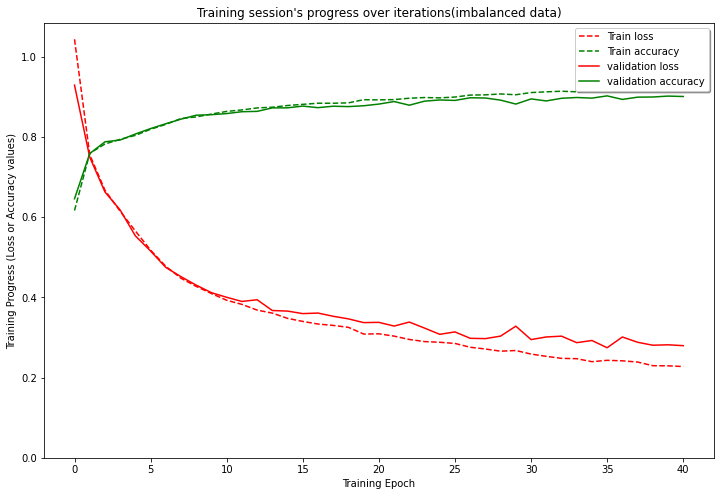

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5076
           1       0.85      0.63      0.72       543
           2       0.81      0.56      0.66       540
           3       0.89      0.87      0.88       962
           4       0.93      0.89      0.91      1808

    accuracy                           0.90      8929
   macro avg       0.88      0.78      0.82      8929
weighted avg       0.90      0.90      0.90      8929

Confusion Matrix:
[[4952   53   16   21   34]
 [ 190  340    6    4    3]
 [ 124    8  303   66   39]
 [  58    1   31  835   37]
 [ 174    0   17    9 1608]]


D:\Anaconda\envs\tf2\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


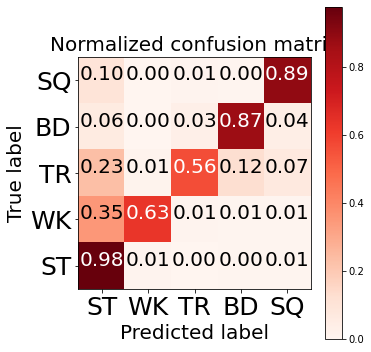

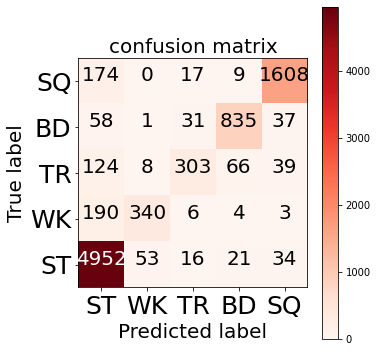

[[4.952e+03 5.300e+01 1.600e+01 2.100e+01 3.400e+01]
 [1.900e+02 3.400e+02 6.000e+00 4.000e+00 3.000e+00]
 [1.240e+02 8.000e+00 3.030e+02 6.600e+01 3.900e+01]
 [5.800e+01 1.000e+00 3.100e+01 8.350e+02 3.700e+01]
 [1.740e+02 0.000e+00 1.700e+01 9.000e+00 1.608e+03]]
xd_0.6的average-macro-f1-score:82.23206680692137%


In [32]:
from sklearn.model_selection import StratifiedKFold
skf1 = StratifiedKFold(n_splits=5,shuffle=True)
skf2 = StratifiedKFold(n_splits=5,shuffle=True)

from sklearn.model_selection import LeaveOneGroupOut
logo = LeaveOneGroupOut()
# logo.get_n_splits(X, Y, group)

from sklearn.model_selection import LeavePGroupsOut
lpgo = LeavePGroupsOut(n_groups=2)

from sklearn.model_selection import StratifiedGroupKFold
sgkf=StratifiedGroupKFold(n_splits=3,shuffle=True)

window_sizes=[0.6]
positions=["xd"]
conv_layers_num=[2] #最优2
filters_nums=[256] #最优256
kernel_sizes=[3] #最优3
LSTM_nums=[64] #最优64

for position in positions:
    for window_size in window_sizes:
        for conv_layer_num in conv_layers_num:
            for filters_num in filters_nums:
                for kernel_size in kernel_sizes:
                    for LSTM_num in LSTM_nums:
                        print("--------------开始"+position+"_"+str(window_size)+"s_卷积层数为"+str(conv_layer_num)+"_lstm单元数为"+str(LSTM_num)+"_卷积核数为"+str(filters_num)+"_卷积核大小为"+str(kernel_size)+"的generalized实验--------------")
                        data=load_data(window_size,position)
                        class_num=5
#                         subjects=["Rebar1","Rebar2","Rebar3"]
                        subjects=["Rebar1","Rebar2","Rebar3","Carpenter1","Carpenter2","Masonry1","Masonry2"]
#                         subjects=["Rebar1","Rebar2","Rebar3"]
                        LABELS = [ "ST", "WK",  "TR", "BD", "SQ"]
                #         for subject in subjects:
                #             if subject=="Carpenter1" or subject=="Carpenter2":
                #                 class_num=5
                #                 LABELS = [ "ST", "WK",  "TR", "BD", "SQ"] 
                # #             elif subject=="Masonry1" or subject=="Masonry2":
                # #                 class_num=6
                # #                 LABELS = [ "ST", "WK",  "TR", "BD", "SQ","WO"] 
                #             else:
                #                 LABELS = [ "ST", "WK", "TR", "BD", "SQ"]

                #         print("--------------开始第"+subject+"--------------")
                        X,Y,Group=dataset_generate(window_size,data,subjects)
                        distribution_check(Y)
                        Y=int_encoder(Y)
                        # filter=[32,64,128]
                        # kernel_sizes=[3,4,7,9]
                        # LSTM_nums=[16,32,64,128]
                        # for kernel_size in kernel_sizes:
                        average_macrof1_score=0.0
                        num=1
                        confusion_matrix=np.zeros((class_num,class_num))
                        # print("--------------开始LSTM_num为"+str(kernel_size)+"的实验--------------")
                        for train_total_index, test_index in skf1.split(X, Y):
#                         for train_total_index, test_index in logo.split(X, Y,Group):
#                             print("--------------开始第"+str(num)+"次交叉验证--------------")
#                             print("当前测试集为"+str(Group[test_index[0],]))
#                             if str(Group[test_index[0],]) != "Masonry1"  : 
#                                 continue
                        #     print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
                        #     X_train, X_test = X[train_index], X[test_index]
                        #     y_train, y_test = Y[train_index], Y[test_index]
                        #     print(train_total_index)
                            X_test, y_test = X[test_index],Y[test_index]
                            X_train_total,y_train_total=X[train_total_index],Y[train_total_index]
#                             X_train_total,y_train_total=smote(X_train_total,y_train_total)
                            print(Counter(y_train_total))
                            X_train, y_train = [],[]
                            X_validation,y_validation=[],[]
                            print(y_train_total)
                            number=1
                            for train_index, validation_index in skf1.split(X_train_total, y_train_total):
                                if number==1:
                                    X_train, y_train = X_train_total[train_index],y_train_total[train_index]
                                    X_validation,y_validation=X_train_total[validation_index],y_train_total[validation_index]
                                    number=number+1
                                else:
                                    break
                        #     Group_train_total=Group[train_total_index]
                            print(train_total_index.shape)
                            print(test_index.shape)
                            print(Counter(y_test))
                            print(Counter(y_train))
                            print(Counter(y_validation))
                        #     print(Counter(y_train_total))
                        #     for train_index,validation_index in skf1.split(X_train_total,y_train_total):
                        # #         print("当前验证集为"+str(Group_train_total[validation_index[0],]))
                        #         X_train, X_validation = X_train_total[train_index], X_train_total[validation_index]
                        #         y_train, y_validation = y_train_total[train_index], y_train_total[validation_index]
                        #         print(train_index.shape)
                        #         print(validation_index.shape)

                        #         print(Counter(y_train))
                        #         print(Counter(y_validation))
        #                     smote(X_train_total,y_train_total)
                            model=construct_model(conv_layer_num=conv_layer_num ,kernel_size=kernel_size,filters_num=filters_num,pool=3,window_size_for_model=int(window_size*50),LSTM_num=LSTM_num,class_num=class_num)
                            model_fit(model,X_train=X_train,y_train=y_train,X_validation=X_validation,y_validation=y_validation,batch_size=256)
                            results,confusion_matrix_temp=model_test(model,X_test=X_test,y_test=y_test,class_num=class_num,LABELS=LABELS)
                        #     print(results['f1-score'])
                            average_macrof1_score=average_macrof1_score + results
                            confusion_matrix=confusion_matrix+confusion_matrix_temp
                            del model
                        #         break
                            num=num+1
                            break

                #             plt.figure(figsize=(5,5))
                #             plt.grid(b=False)
                #             plot_confusion_matrix(confusion_matrix, classes=LABELS, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.Reds)
                #             ax = plt.gca()
                #             plt.show()
                #             plt.figure(figsize=(5,5))
                #             plot_confusion_matrix(confusion_matrix, classes=LABELS, normalize=False, title='confusion matrix',cmap=plt.cm.Reds)
                #             ax = plt.gca()
                #             plt.show()
                        print(confusion_matrix)
                        print(position+"_"+str(window_size)+"的average-macro-f1-score:"+str(average_macrof1_score/(num-1))+"%")

